In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
# Генерируем уникальный seed
my_code = "Osmanov"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

np.random.seed(my_seed)

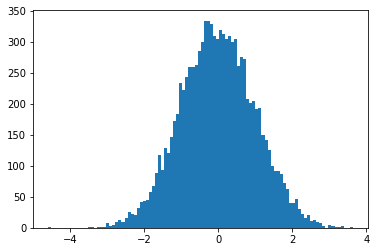

In [11]:
# Формируем случайную нормально распределенную выборку sample
N = 10000
sample = np.random.normal(0, 1, N)

plt.hist(sample, bins=100)
plt.show()

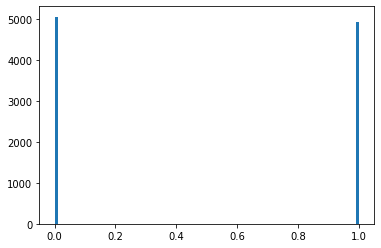

In [12]:
# Формируем массив целевых метока классов: 0 - если значение в sample меньше t и 1 - если больше
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])
plt.hist(target_labels, bins=100)
plt.show()

In [35]:
# Используя данные заготовки (или, при желании, не используя), 
# реализуйте функции для рассчета accuracy, precision, recall и F1

def confusion_matrix(target_labels, model_labels) :
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(target_labels)) :
        if target_labels[i] == 1 and model_labels[i] == 1 :
            tp += 1
        if target_labels[i] == 0 and model_labels[i] == 0 :
            tn += 1
        if target_labels[i] == 0 and model_labels[i] == 1 :
            fp += 1
        if target_labels[i] == 1 and model_labels[i] == 0 :
            fn += 1
    return tp, tn, fp, fn

def accuracy (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    res = (tp + tn) / (tp + fp + tn + fn)
    return res

def precision (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    res = tp / (tp + fp)
    return res

def recall (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    res = tp / (tp + fn)
    return res

def F1 (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    res = 2 * precision(target_labels, model_labels) * recall(target_labels, model_labels) / (precision(target_labels, model_labels) + recall(target_labels, model_labels))
    return res

def print_metrics(target_labels, model_labels) :
    print('accuracy =', accuracy (target_labels, model_labels))
    print('precision =', precision (target_labels, model_labels))
    print('recall =', recall (target_labels, model_labels))
    print('F1 =', F1 (target_labels, model_labels))


In [36]:
# Первый эксперимент: t = 0, модель с вероятностью 50% возвращает 0 и 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
print_metrics (target_labels, model_labels)

accuracy = 0.495
precision = 0.4883628406604337
recall = 0.4976687614027975
F1 = 0.4929718875502008


In [37]:
# Второй эксперимент: t = 0, модель с вероятностью 25% возвращает 0 и с 75% - 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

labels = np.random.randint(4, size=N)
model_labels = np.array([0 if i == 0 else 1 for i in labels])
np.random.shuffle(model_labels)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
print_metrics (target_labels, model_labels)

accuracy = 0.4977
precision = 0.49401277275146355
recall = 0.7526859922967768
F1 = 0.5965137762069243


In [ ]:
# Проанализируйте, какие из метрик применимы в первом и втором экспериментах.

In [38]:
# Третий эксперимент: t = 2, модель с вероятностью 50% возвращает 0 и 1
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
print_metrics (target_labels, model_labels)

accuracy = 0.4999
precision = 0.022781774580335732
recall = 0.5066666666666667
F1 = 0.04360298336201951


In [42]:
# Четвёртый эксперимент: t = 2, модель с вероятностью 100% возвращает 0
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.zeros(N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
print_metrics (target_labels, model_labels)

accuracy = 0.9775


ZeroDivisionError: division by zero

In [ ]:
# Проанализируйте, какие из метрик применимы в третьем и четвёртом экспериментах.

# Примечание: Вся дополнительная информация описана в docx файле.